In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [6]:
import os
print(os.listdir('data'))

['drugsComTest_raw.tsv', 'drugsComTrain_raw.tsv']


In [7]:
train_data = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')
test_data = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')

# list data dimension
print(train_data.shape)
print(test_data.shape)

(161297, 7)
(53766, 7)


In [8]:
train_data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [9]:
# convert date format
train_data.date = pd.to_datetime(train_data.date)

Text(0.5, 1.0, 'Top20 drugs used condition')

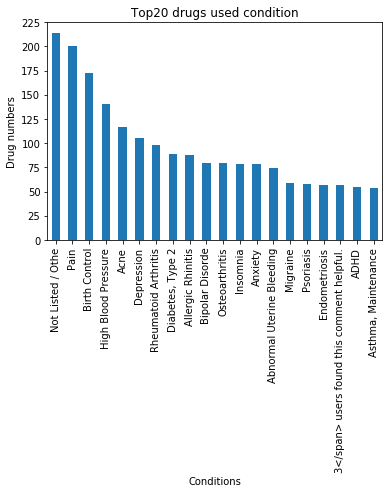

In [10]:
# number of drug per condition
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_drugPerCond[0:20].plot(kind="bar")
plt.xlabel("Conditions")
plt.ylabel("Drug numbers")
plt.title("Top20 drugs used condition")

前20個使用藥品數量(drug numbers)最多的狀況(conditions)中，有一項  3 < /span>  users found this comment helpful ，並非一般所認定之情形，先行移除。

In [17]:
# remove 
for i, data in enumerate(train_data['condition']):
    if ('</span>' in data):
        print(data)
    
#train_data = train_data[train_data.condition != '3</span> users found this comment helpful.']
#train_data = train_data[train_data.condition != 'Not Listed / Othe']

Left Ventricular Dysfunction
ADHD
Birth Control
Birth Control
Opiate Dependence
Benign Prostatic Hyperplasia
Emergency Contraception
Bipolar Disorde
Epilepsy
Birth Control
Migraine Prevention
Depression
Crohn's Disease
Cough
Birth Control
Obesity
Urinary Tract Infection
ibromyalgia
Bipolar Disorde
Chronic Myelogenous Leukemia
HIV Infection
Insomnia
Birth Control
Rheumatoid Arthritis
Vaginal Yeast Infection
Chlamydia Infection
Hirsutism
ADHD
Panic Disorde
Migraine
nan
Depression
Pain
Vaginal Yeast Infection
Irritable Bowel Syndrome
Osteoarthritis
Constipation
Pain
Bowel Preparation
Psychosis
Vaginal Yeast Infection
Obesity
Panic Disorde
Muscle Spasm
Depression
Hepatitis C
Hepatitis C
Bipolar Disorde
Overactive Bladde
Urinary Tract Infection
Diabetes, Type 2
ADHD
Pain
Asthma, Maintenance
Non-Small Cell Lung Cance
Schizophrenia
Dysuria
Bipolar Disorde
Smoking Cessation
Birth Control
Anxiety
Birth Control
Pain
Birth Control
Birth Control
Bowel Preparation
Acne
Depression
Birth Control
Acne

Birth Control
Pain
Emergency Contraception
Depression
GERD
Breast Cance
Birth Control
GERD
ADHD
Nausea/Vomiting of Pregnancy
Birth Control
emale Infertility
Birth Control
Acne
Bacterial Vaginitis
Birth Control
Tonsillitis/Pharyngitis
Bipolar Disorde
4</span> users found this comment helpful.
Migraine
Chlamydia Infection
Hepatitis C
Upper Respiratory Tract Infection
Psoriatic Arthritis
Birth Control
Urinary Retention
Birth Control
High Cholesterol
Birth Control
Migraine
Birth Control
Insomnia
Prevention of Thromboembolism in Atrial Fibrillation
Birth Control
Anxiety
Nausea/Vomiting
Sinusitis
Obesity
Generalized Anxiety Disorde
Abnormal Uterine Bleeding
Seizure Prevention
Urinary Tract Infection
Abnormal Uterine Bleeding
Bowel Preparation
Birth Control
Birth Control
Deep Vein Thrombosis
Schizoaffective Disorde
Migraine
Acne
Atrial Fibrillation
Diabetes, Type 2
Bacterial Infection
Schizophrenia
Constipation, Drug Induced
Sciatica
High Blood Pressure
Allergic Rhinitis
High Blood Pressure
A

Migraine
Constipation
Asthma, acute
Insomnia
Hyperhidrosis
Smoking Cessation
High Blood Pressure
Perimenopausal Symptoms
Pain
Birth Control
Birth Control
Muscle Spasm
Herpes Simplex, Suppression
Birth Control
Osteoarthritis
Obstructive Sleep Apnea/Hypopnea Syndrome
Obsessive Compulsive Disorde
Acne
Birth Control
Depression
Depression
High Blood Pressure
nan
Depression
Irritable Bowel Syndrome
Birth Control
ADHD
Sexual Dysfunction, SSRI Induced
Emergency Contraception
Weight Loss
Constipation, Drug Induced
Weight Loss
Chronic Myelogenous Leukemia
High Cholesterol
Vaginal Yeast Infection
Anxiety
Birth Control
Upper Respiratory Tract Infection
Anxiety
Pain
GERD
Depression
Obesity
Hypogonadism, Male
Underactive Thyroid
Hepatitis C
Depression
Birth Control
Bladder Infection
Birth Control
Depression
Acne
Hot Flashes
Pain
Anxiety
Cough
Irritable Bowel Syndrome
Irritable Bowel Syndrome
Nasal Congestion
Constipation
Back Pain
Depression
Bipolar Disorde
Gouty Arthritis
Acne
Anxiety
Obsessive Com

Anxiety
Vaginal Yeast Infection
Birth Control
Obsessive Compulsive Disorde
Birth Control
Hypogonadism, Male
Depression
HIV Infection
Birth Control
ibromyalgia
Chronic Pain
Schizoaffective Disorde
ADHD
Birth Control
ibromyalgia
Allergic Rhinitis
Obesity
Insomnia
Bacterial Vaginitis
High Blood Pressure
Urinary Retention
Anxiety
Renal Cell Carcinoma
Diabetes, Type 2
Bipolar Disorde
Acne
Pain
Bipolar Disorde
Birth Control
Obesity
Menstrual Disorders
Erectile Dysfunction
Atrophic Vaginitis
Generalized Anxiety Disorde
Borderline Personality Disorde
Depression
Birth Control
High Cholesterol
Depression
Urinary Tract Infection
Acne
Birth Control
Birth Control
Birth Control
Bacterial Skin Infection
Depression
Acne
Birth Control
Diabetes, Type 2
Anxiety
Light Anesthesia
Birth Control
Panic Disorde
Birth Control
Birth Control
Generalized Anxiety Disorde
Rheumatoid Arthritis
Hypothyroidism, After Thyroid Removal
Birth Control
Birth Control
Rheumatoid Arthritis
Bronchitis
Pain
Birth Control
Constipa

Cough
Alcohol Dependence
Muscle Spasm
Depression
Birth Control
Birth Control
Nasal Congestion
ibromyalgia
Depression
Depression
Tendonitis
Chronic Pain
Birth Control
13</span> users found this comment helpful.
Dermatological Disorders
Vaginal Yeast Infection
Inflammatory Conditions
Vaginal Yeast Infection
Herpes Simplex
Birth Control
Asthma, Maintenance
min)
Depression
Obesity
Birth Control
Muscle Spasm
High Blood Pressure
Acute Coronary Syndrome
Pain
Rosacea
HIV Infection
Anxiety
Diabetes, Type 2
Muscle Spasm
Cough and Nasal Congestion
Acne
Generalized Anxiety Disorde
Anxiety
Birth Control
Atopic Dermatitis
Overactive Bladde
Birth Control
Pain
Parkinson's Disease
Birth Control
Birth Control
Nausea/Vomiting
Pain
Obesity
Birth Control
Depression
Insomnia
Bowel Preparation
Emergency Contraception
Inflammatory Conditions
Anxiety
Acne
Sinusitis
Birth Control
Diabetes, Type 1
Depression
Pain
Erectile Dysfunction
Bacterial Infection
Cough
ADHD
Smoking Cessation
Opioid-Induced Constipation
Em

Pain
Hypertriglyceridemia
Weight Loss
Birth Control
Osteolytic Bone Metastases of Solid Tumors
Schizophrenia
Allergic Rhinitis
Nausea/Vomiting of Pregnancy
Bipolar Disorde
Birth Control
Vaginal Yeast Infection
Birth Control
Urinary Tract Infection
Osteoporosis
Bipolar Disorde
Asthma, Maintenance
ADHD
Opiate Dependence
Depression
Smoking Cessation
Acne
Birth Control
Urinary Tract Infection
Herpes Simplex, Suppression
Birth Control
Pain
Diabetes, Type 2
Depression
Birth Control
Smoking Cessation
Obesity
Constipation
Vitamin/Mineral Supplementation and Deficiency
Emergency Contraception
Multiple Sclerosis
Insomnia
HIV Infection
Obesity
Conjunctivitis, Allergic
Intraocular Hypertension
Bipolar Disorde
Depression
Birth Control
Birth Control
Birth Control
Vulvodynia
Pain
Acne
Migraine
Depression
Hyperhidrosis
Overactive Bladde
Menstrual Disorders
Birth Control
High Cholesterol
Diabetes, Type 2
Gout, Acute
Seizures
Vaginal Yeast Infection
Constipation
Muscle Spasm
Panic Disorde
Birth Control


Birth Control
Obesity
Narcolepsy
Rheumatoid Arthritis
Sinusitis
High Blood Pressure
Bipolar Disorde
Birth Control
Plaque Psoriasis
Erectile Dysfunction
Birth Control
Birth Control
Opiate Dependence
Narcolepsy
Birth Control
Bipolar Disorde
Birth Control
Erectile Dysfunction
Inflammatory Conditions
Clostridial Infection
Birth Control
Depression
ADHD
Birth Control
Skin Cance
Birth Control
Depression
Postmenopausal Symptoms
Chronic Pain
Vaginal Yeast Infection
Birth Control
Sinusitis
Acne
Birth Control
Vaginal Yeast Infection
Bronchitis
Vaginal Yeast Infection
Sinusitis
Panic Disorde
Diabetes, Type 2
Anxiety and Stress
Heart Attack
Birth Control
Nausea/Vomiting of Pregnancy
Urinary Tract Infection
Not Listed / Othe
Period Pain
Weight Loss
Obesity
Acne
Chronic Pain
High Blood Pressure
Diarrhea
Insomnia
ADHD
Acne
Birth Control
Glaucoma, Open Angle
nan
Diabetic Peripheral Neuropathy
Birth Control
Underactive Thyroid
Vaginal Yeast Infection
Insomnia
Alcohol Dependence
Muscle Spasm
Opiate Depen

Anxiety and Stress
Birth Control
Anesthetic Adjunct
Diarrhea
Bipolar Disorde
Vaginal Yeast Infection
Shift Work Sleep Disorde
Migraine Prevention
Constipation
Generalized Anxiety Disorde
Diabetes, Type 2
Obesity
HIV Infection
Hyperhidrosis
High Blood Pressure
ADHD
Birth Control
Obesity
ibromyalgia
Birth Control
Constipation
Insomnia
Bacterial Infection
Rheumatoid Arthritis
Neuropathic Pain
Tinea Cruris
Anxiety
Migraine
Muscle Spasm
Pain
Rosacea
Urinary Tract Infection
Panic Disorde
Chronic Pain
Insomnia
Abnormal Uterine Bleeding
Atrophic Vaginitis
Acne
Insomnia
ibromyalgia
Headache
Bipolar Disorde
Birth Control
Bipolar Disorde
Birth Control
Depression
Smoking Cessation
Pruritus
Urinary Tract Infection
Obsessive Compulsive Disorde
Pain
Anesthesia
Smoking Cessation
Bipolar Disorde
Obesity
Obesity
Weight Loss
Chronic Pain
Birth Control
Generalized Anxiety Disorde
Acne
Urinary Tract Infection
Migraine Prevention
ADHD
Insomnia
Abnormal Uterine Bleeding
Nausea/Vomiting
Birth Control
Nausea/V

Narcolepsy
Migraine
Dental Abscess
Underactive Thyroid
Bipolar Disorde
ADHD
Pain
Dysuria
Migraine
Birth Control
Pain
Hepatitis C
Muscle Spasm
Depression
Acne
Gout, Acute
Anxiety
Rheumatoid Arthritis
Depression
Depression
Birth Control
Bipolar Disorde
Pain
Insomnia
Cough
Bowel Preparation
GERD
Not Listed / Othe
Kidney Infections
Acne
Abnormal Uterine Bleeding
Obesity
Alopecia
Depression
Birth Control
Birth Control
Psoriasis
Vaginal Yeast Infection
Acne
Opiate Withdrawal
Birth Control
Depression
Birth Control
Birth Control
Insomnia
Birth Control
Birth Control
Chronic Pain
Acne
Birth Control
NSAID-Induced Gastric Ulce
Depression
Neuralgia
Diarrhea, Chronic
ADHD
Pain
Migraine
ibromyalgia
Anxiety
6</span> users found this comment helpful.
New Daily Persistent Headache
Endometriosis
Breast Cancer, Metastatic
Urinary Tract Infection
Anxiety
Depression
Birth Control
nan
Birth Control
Bipolar Disorde
Birth Control
Depression
Cough
Pain
Emergency Contraception
Anxiety and Stress
Tonsillitis/Phar

Diabetes, Type 2
Bacterial Vaginitis
Constipation, Chronic
Depression
Birth Control
Birth Control
Birth Control
Depression
Pain
Anxiety
Androgenetic Alopecia
Birth Control
Birth Control
Irritable Bowel Syndrome
Irritable Bowel Syndrome
Birth Control
Obsessive Compulsive Disorde
Birth Control
Birth Control
Muscle Spasm
Weight Loss
Diabetes, Type 2
Panic Disorde
Migraine
Migraine
Birth Control
Sedation
Irritable Bowel Syndrome
High Blood Pressure
Hypogonadism, Male
Birth Control
8</span> users found this comment helpful.
Nausea/Vomiting
Anorexia
8</span> users found this comment helpful.
Irritable Bowel Syndrome
Obesity
Hypogonadism, Male
Birth Control
Chronic Pain
COPD
Birth Control
Emergency Contraception
Depression
Birth Control
Obesity
Weight Loss
Irritable Bowel Syndrome
Obesity
Bipolar Disorde
Prostatitis
Birth Control
Skin or Soft Tissue Infection
Birth Control
Gastroparesis
Human Papilloma Virus
Constipation
Acne
Birth Control
Pain
Pain
Anesthesia
Pain
Birth Control
Sedation
Obes

Birth Control
Anxiety
Anxiety and Stress
Underactive Thyroid
Birth Control
5</span> users found this comment helpful.
Birth Control
Depression
Not Listed / Othe
Obesity
Abnormal Uterine Bleeding
Birth Control
Anxiety
Birth Control
Atrophic Vaginitis
Burns, External
Urinary Tract Infection
Depression
Birth Control
Gout
Weight Loss
Acne
Birth Control
Vaginal Yeast Infection
Depression
Bursitis
Premenstrual Dysphoric Disorde
Birth Control
Weight Loss
Anxiety
Acne
Acne
Major Depressive Disorde
Postpartum Depression
Depression
Acne
Bipolar Disorde
Pain
Overactive Bladde
Herpes Simplex
Tonsillitis/Pharyngitis
Chronic Pain
Insomnia
Anxiety and Stress
Multiple Sclerosis
Insomnia
Conjunctivitis, Bacterial
Urinary Tract Infection
Psoriatic Arthritis
Bowel Preparation
Birth Control
Osteoporosis
Birth Control
Cutaneous Candidiasis
ibromyalgia
Eye Redness
Gingivitis
Birth Control
Pain
Premenstrual Dysphoric Disorde
Nausea/Vomiting
Epilepsy
Allergic Rhinitis
Vaginal Yeast Infection
Bipolar Disorde
A

Insomnia
Chlamydia Infection
ADHD
Acne
Rosacea
Irritable Bowel Syndrome
Birth Control
Cough
Depression
Insomnia
Erectile Dysfunction
Kidney Infections
Birth Control
Plaque Psoriasis
Supraventricular Tachycardia
Opiate Dependence
Narcolepsy
Birth Control
Nausea/Vomiting
Birth Control
Anxiety
Diabetes, Type 2
Xerostomia
Opiate Dependence
Birth Control
Urinary Tract Infection
Meniere's Disease
Bipolar Disorde
Post Traumatic Stress Disorde
Obesity
Anxiety
ADHD
Supraventricular Tachycardia
mulation) (phenylephrine)
Arrhythmia
Menstrual Disorders
Rheumatoid Arthritis
High Blood Pressure
Asthma, Maintenance
Birth Control
Anxiety
Birth Control
Weight Loss
Chronic Pain
Depression
ADHD
Schizophrenia
Weight Loss
Birth Control
Bowel Preparation
Depression
Obesity
Birth Control
Birth Control
Birth Control
Depression
Underactive Thyroid
Constipation
Pain
Diabetes, Type 2
Birth Control
Bowel Preparation
emale Infertility
Hyperhidrosis
Anxiety
Birth Control
Bowel Preparation
High Blood Pressure
Schizo

Renal Cell Carcinoma
Acne
Influenza
Rosacea
High Blood Pressure
Emergency Contraception
Bacterial Infection
Birth Control
Birth Control
Muscle Spasm
ADHD
Depression
Depression
ADHD
Obesity
Irritable Bowel Syndrome
Acne
Depression
Vaginal Yeast Infection
Acne
Erectile Dysfunction
Psoriatic Arthritis
Pain
Overactive Bladde
High Blood Pressure
Insomnia
Birth Control
Bronchitis
Birth Control
Psoriasis
Abnormal Uterine Bleeding
Anesthesia
Pain
Anesthesia
Anxiety
Narcolepsy
Birth Control
Weight Loss
Acne
Atrophic Vaginitis
Obesity
Diabetes, Type 2
Diabetes, Type 2
Acne
Generalized Anxiety Disorde
Birth Control
Bipolar Disorde
Bipolar Disorde
Inflammatory Bowel Disease
Birth Control
Birth Control
Weight Loss
Acne
Birth Control
Stomach Ulce
Post Traumatic Stress Disorde
Birth Control
Birth Control
Pain
Depression
Birth Control
Insomnia
Weight Loss
Erectile Dysfunction
Narcolepsy
Hepatitis C
Weight Loss
Weight Loss
Insomnia
Birth Control
Obesity
Birth Control
Opioid-Induced Constipation
Birth C

Panic Disorde
Migraine
Birth Control
Birth Control
Birth Control
Binge Eating Disorde
Tinea Pedis
COPD
Acne
Bacterial Infection
Major Depressive Disorde
High Cholesterol
Depression
Restless Legs Syndrome
Psoriatic Arthritis
Hepatitis C
Pruritus
Birth Control
Acne
ge (amlodipine / valsartan)
Obesity
Birth Control
Depression
Emergency Contraception
Birth Control
Insomnia
Bacterial Vaginitis
Birth Control
Acne
Spondyloarthritis
Bipolar Disorde
Obesity
nan
Anxiety
Erectile Dysfunction
Multiple Sclerosis
Obesity
Anxiety
Weight Loss
Pain
Birth Control
Cold Sores
Weight Loss
Emergency Contraception
Birth Control
Anxiety
Asthma, Maintenance
Headache
Psoriasis
Depression
Panic Disorde
Bipolar Disorde
Rheumatoid Arthritis
Acne
Birth Control
Smoking Cessation
Vaginal Yeast Infection
Anxiety
Ulcerative Colitis
Onychomycosis, Toenail
Obesity
Pain
ADHD
Acne
ADHD
ADHD
Birth Control
Bowel Preparation
Overactive Bladde
Migraine
High Blood Pressure
Emergency Contraception
Depression
Weight Loss
Birth Co

Hyperhidrosis
nan
GERD
COPD
Pain
Anxiety
Anemia Associated with Chronic Renal Failure
Head Lice
Depression
Abnormal Uterine Bleeding
Dysuria
Cough
Nasal Congestion
Pain
Anxiety
Premenstrual Dysphoric Disorde
ADHD
Amenorrhea
Postmenopausal Symptoms
Bacterial Infection
Muscle Spasm
Chronic Idiopathic Constipation
Pain
Depression
Bipolar Disorde
Birth Control
Migraine Prevention
Onychomycosis, Toenail
Anxiety
Sciatica
Constipation
Anxiety
Birth Control
Anxiety
Anxiety
Light Anesthesia
Asthma, Maintenance
Constipation
Birth Control
Abnormal Uterine Bleeding
Cough
Obsessive Compulsive Disorde
Depression
Upper Respiratory Tract Infection
Not Listed / Othe
Pain
Psychosis
Anxiety
Osteoarthritis
Birth Control
Mania
Weight Loss
Vaginal Yeast Infection
Insomnia
Birth Control
Birth Control
Sinusitis
Psoriatic Arthritis
Nausea/Vomiting
Overactive Bladde
Restless Legs Syndrome
Birth Control
Obesity
Asthma, Maintenance
Constipation
nan
Acne
Vaginal Yeast Infection
Menstrual Disorders
Birth Control
Bi

High Cholesterol
Sedation
Chronic Pain
Depression
Muscle Spasm
Birth Control
Anxiety
Birth Control
Weight Loss
Acne
ADHD
Birth Control
Muscle Spasm
Urinary Tract Infection
High Blood Pressure
Abnormal Uterine Bleeding
Nausea/Vomiting
Bipolar Disorde
Pain
Muscle Spasm
Anxiety and Stress
Social Anxiety Disorde
Obsessive Compulsive Disorde
Abnormal Uterine Bleeding
Abnormal Uterine Bleeding
Pneumonia
Not Listed / Othe
High Blood Pressure
Schizophrenia
Panic Disorde
Neurosurgery
Alzheimer's Disease
Bowel Preparation
Obesity
Diabetes, Type 2
ADHD
Osteoarthritis
1</span> users found this comment helpful.
Skin and Structure Infection
Polycythemia Vera
Insomnia
Birth Control
Abnormal Uterine Bleeding
Keratoconjunctivitis Sicca
Major Depressive Disorde
Birth Control
Vaginal Yeast Infection
Weight Loss
Erectile Dysfunction
Birth Control
Schizoaffective Disorde
Benign Prostatic Hyperplasia
Back Pain
Not Listed / Othe
Birth Control
Diabetes, Type 2
Birth Control
Depression
Irritable Bowel Syndrome

Polycystic Ovary Syndrome
Birth Control
Hypertriglyceridemia
Birth Control
Obesity
Dry Eye Disease
Migraine
ADHD
Depression
Chronic Pain
Schizophrenia
ibromyalgia
Not Listed / Othe
Diabetes, Type 2
Asthma, Maintenance
Birth Control
Plaque Psoriasis
Depression
Migraine
Pain
Insomnia
Migraine
Birth Control
Birth Control
Irritable Bowel Syndrome
Generalized Anxiety Disorde
Birth Control
Osteoarthritis
Bipolar Disorde
Acne
Weight Loss
Weight Loss
Migraine Prevention
Birth Control
Schizophrenia
Anxiety
Schizophrenia
Depression
Depression
Depression
Anxiety
Birth Control
ibromyalgia
Birth Control
Birth Control
Birth Control
Obesity
Migraine Prevention
Smoking Cessation
Multiple Sclerosis
Abnormal Uterine Bleeding
High Blood Pressure
Pain
Bronchitis
Bowel Preparation
Birth Control
Depression
Abnormal Uterine Bleeding
Depression
Birth Control
Social Anxiety Disorde
Cluster Headaches
Birth Control
Abnormal Uterine Bleeding
Bipolar Disorde
Bipolar Disorde
ADHD
Birth Control
Chronic Pain
Panic Di

ibromyalgia
Birth Control
ADHD
Obstructive Sleep Apnea/Hypopnea Syndrome
Onychomycosis, Toenail
Depression
Obesity
HIV Infection
Birth Control
ibromyalgia
Bipolar Disorde
Birth Control
Ankylosing Spondylitis
Birth Control
Bowel Preparation
Bipolar Disorde
Birth Control
Opiate Withdrawal
Muscle Spasm
Generalized Anxiety Disorde
Birth Control
Herpes Simplex
Sinusitis
Birth Control
Vaginal Yeast Infection
Birth Control
Birth Control
Birth Control
Birth Control
Abnormal Uterine Bleeding
Anxiety and Stress
Acne
Insomnia
High Cholesterol
Bipolar Disorde
Androgenetic Alopecia
ADHD
Constipation, Chronic
Obesity
Weight Loss
ibromyalgia
Birth Control
Eczema
Post Traumatic Stress Disorde
Erectile Dysfunction
Migraine
Cervical Dystonia
Emergency Contraception
Obesity
Diverticulitis
Generalized Anxiety Disorde
Generalized Anxiety Disorde
Migraine
Ulcerative Colitis
Depression
Birth Control
Rheumatoid Arthritis
Allergic Rhinitis
Depression
Insomnia
Depression
Birth Control
Bowel Preparation
Not List

Major Depressive Disorde
Depression
Depression
Acne
Birth Control
Bipolar Disorde
Premenstrual Dysphoric Disorde
Obesity
Acne
Diabetes, Type 2
ADHD
Emergency Contraception
Birth Control
Vaginal Yeast Infection
Bronchitis
Birth Control
Glaucoma, Open Angle
Bowel Preparation
Anxiety
Crohn's Disease
Allergic Rhinitis
Major Depressive Disorde
Birth Control
Diabetes, Type 2
ADHD
Birth Control
Malaria
Birth Control
Pain
Birth Control
Diabetes, Type 2
Constipation
Anxiety
Birth Control
Vaginal Yeast Infection
ibromyalgia
Birth Control
Birth Control
Urinary Tract Infection
Bowel Preparation
4</span> users found this comment helpful.
GERD
Emergency Contraception
ibromyalgia
Abnormal Uterine Bleeding
Birth Control
Acne
Seizure Prevention
Seizures
Premenstrual Dysphoric Disorde
Emergency Contraception
Acne
Asthma, Maintenance
Constipation, Chronic
Birth Control
Labor Induction
Epilepsy
Opiate Dependence
Arrhythmia
Birth Control
Birth Control
Emergency Contraception
Depression
Birth Control
Birth 

Birth Control
Birth Control
Depression
Birth Control
Birth Control
Weight Loss
Dermatitis
Depression
Depression
Smoking Cessation
Chronic Pain
Dysuria
Birth Control
Pneumonia
Obesity
Dysuria
Depression
Obesity
Depression
Back Pain
Obesity
Psoriasis
Helicobacter Pylori Infection
High Cholesterol
New Daily Persistent Headache
Transverse Myelitis
Anxiety
Alzheimer's Disease
Acne
Onychomycosis, Fingernail
Weight Loss
ADHD
Pain
Weight Loss
Pain
Depression
Bacterial Vaginitis
Constipation, Drug Induced
Alcohol Dependence
Vertig
Birth Control
Sinusitis
Obesity
Emergency Contraception
Bowel Preparation
Birth Control
Eye Redness
Birth Control
Birth Control
Birth Control
ibromyalgia
Schizoaffective Disorde
Depression
Birth Control
Hyperhidrosis
Emergency Contraception
Generalized Anxiety Disorde
1</span> users found this comment helpful.
Diarrhea, Chronic
Left Ventricular Dysfunction
Depression
Sinusitis
Anxiety and Stress
Birth Control
Migraine Prevention
Acne
Acne
Muscle Spasm
Birth Control
In

Depression
Emergency Contraception
Migraine
Ovarian Cysts
Depression
Birth Control
Birth Control
Lennox-Gastaut Syndrome
Motion Sickness
Diabetes, Type 2
Depression
High Cholesterol
Pain
Bone infection
Birth Control
Major Depressive Disorde
Menstrual Disorders
Pain
Birth Control
Anxiety
Birth Control
Migraine Prevention
Depression
Tuberculosis, Latent
Menstrual Disorders
Obesity
Irritable Bowel Syndrome
High Cholesterol
Birth Control
Birth Control
Hepatitis C
Irritable Bowel Syndrome
Osteoporosis
Depression
High Blood Pressure
Insomnia
Overactive Bladde
Multiple Sclerosis
Premenstrual Dysphoric Disorde
Birth Control
Diabetes, Type 1
Acne
Onychomycosis, Toenail
Depression
Irritable Bowel Syndrome
Hashimoto's disease
Diabetes, Type 2
Anxiety
Obesity
Pain
Diabetes, Type 2
Nasal Congestion
Pain
Birth Control
Anxiety
Birth Control
ADHD
nan
Depression
nan
Bladder Infection
Chronic Pain
Obsessive Compulsive Disorde
Panic Disorde
Migraine Prevention
Abnormal Uterine Bleeding
High Cholesterol
N

Smoking Cessation
Dietary Supplementation
Depression
Urinary Tract Infection
Cough
Birth Control
Obesity
Panic Disorde
Influenza
Smoking Cessation
ibromyalgia
Depression
Psoriasis
Obsessive Compulsive Disorde
Urinary Tract Infection
ADHD
Birth Control
Psoriatic Arthritis
Pain
Birth Control
Diarrhea
Weight Loss
Diabetes, Type 2
Bronchitis
Eye Redness
Birth Control
Insomnia
Acne
Erectile Dysfunction
Bowel Preparation
Pain
Depression
Chronic Pain
Pain
Urinary Tract Infection
Bacterial Vaginitis
Depression
Anxiety
Muscle Spasm
Birth Control
Constipation, Drug Induced
Menstrual Disorders
Obesity
Cough
Opiate Dependence
Obesity
Depression
Osteoarthritis
Opiate Dependence
Birth Control
Diabetes, Type 2
Depression
Birth Control
Birth Control
Weight Loss
Anxiety
Headache
Depression
Endometriosis
Birth Control
Vaginal Yeast Infection
Muscle Spasm
Acne
nan
Anxiety
Benign Essential Trem
Birth Control
Allergies
Hepatitis C
Allergic Rhinitis
Schizophrenia
Chronic Pain
Overactive Bladde
Birth Control

Bacterial Infection
Birth Control
Herpes Zoster, Prophylaxis
Anxiety
45</span> users found this comment helpful.
Back Pain
Hashimoto's disease
Allergic Rhinitis
Erectile Dysfunction
Anxiety
ADHD
Birth Control
ADHD
Abnormal Uterine Bleeding
Birth Control
Tendonitis
Constipation
Depression
Birth Control
Chlamydia Infection
Prevention of Thromboembolism in Atrial Fibrillation
Birth Control
Birth Control
High Blood Pressure
Vaginal Yeast Infection
Obesity
Ulcerative Colitis
Nasal Congestion
Anxiety and Stress
Smoking Cessation
Pneumonia
Birth Control
Emergency Contraception
Diabetes, Type 2
Birth Control
Constipation
Birth Control
Prostatitis
Constipation
Bipolar Disorde
Birth Control
Acne
Back Pain
Postmenopausal Symptoms
Birth Control
Allergic Rhinitis
Birth Control
Bladder Infection
Birth Control
Depression
ADHD
Birth Control
Birth Control
Birth Control
Crohn's Disease
Insomnia
Constipation, Chronic
Birth Control
Weight Loss
Back Pain
Narcolepsy
eve
Anxiety
Premenstrual Dysphoric Disord

Birth Control
Hypothyroidism, After Thyroid Removal
Panic Disorde
Rosacea
Anxiety
Emergency Contraception
Depression
Chronic Pain
Multiple Sclerosis
Birth Control
Depression
Insomnia
Deep Vein Thrombosis, Prophylaxis
Birth Control
Birth Control
Emergency Contraception
Asthma, Maintenance
Birth Control
Birth Control
High Blood Pressure
Hashimoto's disease
Weight Loss
Emergency Contraception
Diverticulitis
Obesity
Birth Control
Anxiety
Birth Control
Anxiety and Stress
Birth Control
Bipolar Disorde
Abnormal Uterine Bleeding
Abnormal Uterine Bleeding
Diabetes, Type 2
Vaginal Yeast Infection
Lennox-Gastaut Syndrome
Cough
Nausea/Vomiting of Pregnancy
Emergency Contraception
Abnormal Uterine Bleeding
Bipolar Disorde
Cough
Herpes Simplex, Suppression
Pain
Bipolar Disorde
Birth Control
Muscle Spasm
Weight Loss
Major Depressive Disorde
Nausea/Vomiting
High Blood Pressure
Acne
Birth Control
Anxiety and Stress
Depression
Major Depressive Disorde
Influenza
Depression
Muscle Spasm
Obesity
Depression

Pain
Birth Control
Depression
Cold Sores
Depression
Birth Control
Birth Control
Bowel Preparation
Muscle Spasm
Abnormal Uterine Bleeding
Birth Control
Schizoaffective Disorde
Bipolar Disorde
Birth Control
ibromyalgia
Hypogonadism, Male
Allergic Rhinitis
Acne
Constipation, Chronic
Acne
High Blood Pressure
Bipolar Disorde
Obesity
Helicobacter Pylori Infection
Constipation
GERD
Pain
Birth Control
ADHD
Anesthesia
0</span> users found this comment helpful.
Hypogonadism, Male
Acne
Obsessive Compulsive Disorde
Bipolar Disorde
Birth Control
Weight Loss
Headache
Bowel Preparation
Post Traumatic Stress Disorde
Acne
Obesity
Smoking Cessation
Birth Control
Abnormal Uterine Bleeding
Ulcerative Colitis
Anxiety
Pain
Migraine Prevention
Birth Control
Generalized Anxiety Disorde
Epilepsy
Weight Loss
High Blood Pressure
Parkinson's Disease
Emergency Contraception
Major Depressive Disorde
Bowel Preparation
Schizoaffective Disorde
Obesity
ibromyalgia
min / sitagliptin)
Diabetes, Type 2
High Blood Pressure

Birth Control
Birth Control
Muscle Spasm
Depression
Anxiety
Opiate Withdrawal
Birth Control
Pain
Hot Flashes
Insomnia
Migraine
Birth Control
Birth Control
Anxiety
Hyperprolactinemia
Premenstrual Dysphoric Disorde
Pityriasis rubra pilaris
Strep Throat
Weight Loss
Insomnia
Birth Control
Restless Legs Syndrome
Migraine Prevention
Chronic Pain
Migraine
Birth Control
Birth Control
Hepatitis C
Birth Control
High Cholesterol
Pneumonia
Narcolepsy
Birth Control
Inflammatory Conditions
High Blood Pressure
Multiple Sclerosis
Psoriasis
Smoking Cessation
Insomnia
High Blood Pressure
Depression
Depression
Muscle Pain
Birth Control
Acne
Light Sedation
Muscle Spasm
Anxiety and Stress
Anxiety
Birth Control
Nausea/Vomiting
23</span> users found this comment helpful.
Birth Control
Birth Control
Panic Disorde
Birth Control
COPD, Maintenance
Birth Control
Birth Control
Birth Control
Vaginal Yeast Infection
Birth Control
High Cholesterol
Birth Control
Migraine Prevention
Birth Control
Migraine Prevention
De

Arrhythmia
Multiple Sclerosis
Constipation
Motion Sickness
Birth Control
Birth Control
Depression
Vaginal Yeast Infection
Constipation, Chronic
Birth Control
Diabetes, Type 2
Pain
Birth Control
Birth Control
Major Depressive Disorde
Birth Control
Emergency Contraception
Obesity
Emergency Contraception
Pain
Depression
Anxiety
Anxiety
Depression
Bowel Preparation
Hyperhidrosis
Birth Control
Depression
Anxiety
Pain
Anxiety
Irritable Bowel Syndrome
Urinary Tract Stones
Pain
Birth Control
Birth Control
Birth Control
Post Traumatic Stress Disorde
Multiple Sclerosis
Insomnia
Major Depressive Disorde
Pain
Pain
Allergic Rhinitis
Chronic Pain
Obesity
Postmenopausal Symptoms
Otitis Media
nan
Birth Control
ibromyalgia
Obesity
Birth Control
Birth Control
Psoriatic Arthritis
Irritable Bowel Syndrome
Anxiety
Pain
Birth Control
Bacterial Skin Infection
Peripheral Neuropathy
Urinary Tract Infection
Birth Control
Schizoaffective Disorde
Chronic Pain
Onychomycosis, Toenail
Schizophrenia
Helicobacter Pylo

Migraine
Major Depressive Disorde
Overactive Bladde
Birth Control
Obesity
Anxiety
Uterine Fibroids
Cough
Vaginal Yeast Infection
Weight Loss
Overactive Bladde
Depression
Anxiety
Obsessive Compulsive Disorde
Birth Control
Birth Control
Pain
Pain
Hiccups
Generalized Anxiety Disorde
Herpes Simplex
Acne
Weight Loss
Psoriasis
Depression
Birth Control
Birth Control
Inflammatory Conditions
Pain
Birth Control
Birth Control
HIV Infection
Weight Loss
Bowel Preparation
Epilepsy
Nausea/Vomiting of Pregnancy
Sinusitis
Depression
Major Depressive Disorde
Depression
Birth Control
Birth Control
Constipation
Birth Control
Anxiety
Bacterial Vaginitis
Bipolar Disorde
Chlamydia Infection
Anorexia
ibromyalgia
Urinary Incontinence
Peripheral Neuropathy
Birth Control
Herpes Simplex
HIV Infection
Birth Control
Pain
Rheumatoid Arthritis
Anxiety
nan
Depression
Bowel Preparation
Sinusitis
Acne
Birth Control
Anxiety and Stress
Neuropathic Pain
Acne
Bipolar Disorde
Obesity
Rhinitis
Smoking Cessation
Anxiety and St

Depression
Schizophrenia
Anxiety
Rosacea
Weight Loss
Birth Control
5</span> users found this comment helpful.
Panic Disorde
Postpartum Depression
Smoking Cessation
Inflammatory Conditions
Anxiety
Abnormal Uterine Bleeding
Depression
Osteoporosis
Generalized Anxiety Disorde
Birth Control
Social Anxiety Disorde
Panic Disorde
Bronchitis
Diabetes, Type 2
Polycystic Ovary Syndrome
Chronic Lymphocytic Leukemia
Atopic Dermatitis
Obsessive Compulsive Disorde
Diabetes, Type 2
Birth Control
Abnormal Uterine Bleeding
Acne
nan
Endometriosis
Rheumatoid Arthritis
Insomnia
Birth Control
Anxiety and Stress
Ankylosing Spondylitis
Birth Control
Migraine
Migraine Prevention
Alcohol Dependence
Transient Ischemic Attack
Back Pain
Smoking Cessation
min / pioglitazone)
High Cholesterol
Chronic Myelogenous Leukemia
ibromyalgia
Somatoform Pain Disorde
Insulin Resistance Syndrome
Acne
10</span> users found this comment helpful.
Borderline Personality Disorde
Obesity
Rheumatoid Arthritis
Sinusitis
Rheumatoid Art

Urticaria
Birth Control
Depression
Pain
Birth Control
HIV Infection
Birth Control
Weight Loss
Benign Prostatic Hyperplasia
Depression
Not Listed / Othe
Vulvodynia
Anxiety and Stress
Herpes Simplex, Suppression
Acne
Allergies
Erectile Dysfunction
Birth Control
Cough and Nasal Congestion
Birth Control
Birth Control
Erectile Dysfunction
Birth Control
Keratosis
Tonsillitis/Pharyngitis
Birth Control
Sciatica
Dysautonomia
Birth Control
Irritable Bowel Syndrome
Pain
Birth Control
High Blood Pressure
Anxiety
Perimenopausal Symptoms
Birth Control
ADHD
Migraine Prevention
Cough and Nasal Congestion
High Cholesterol
Migraine Prevention
Birth Control
Anxiety
Allergic Rhinitis
Birth Control
High Blood Pressure
Anxiety
Vaginal Yeast Infection
Birth Control
Hyperhidrosis
ADHD
Migraine Prevention
Insomnia
Birth Control
Sedation
Birth Control
Allergic Reactions
Birth Control
Anxiety
Birth Control
Depression
Nausea/Vomiting
Anxiety
Acne
Acne
Birth Control
Chronic Pain
Depression
Birth Control
Birth Cont

Birth Control
Vaginal Yeast Infection
Weight Loss
Birth Control
Anxiety
Birth Control
Pain
Smoking Cessation
Urinary Tract Infection
Schizophrenia
Weight Loss
Neuropathic Pain
Schizophrenia
Birth Control
Anxiety
Acne
Hot Flashes
Birth Control
Obsessive Compulsive Disorde
Constipation, Chronic
Anxiety and Stress
Migraine
Pain
Birth Control
Birth Control
Depression
Anxiety
Obesity
Acne
Irritable Bowel Syndrome
Bipolar Disorde
Birth Control
nan
Constipation
Insomnia
Migraine Prevention
Atrophic Vaginitis
Hypogonadism, Male
Emergency Contraception
Bronchitis
Anxiety
GERD
Birth Control
Vaginal Yeast Infection
Bipolar Disorde
Acne
Birth Control
Generalized Anxiety Disorde
Diabetes, Type 2
Opiate Dependence
Acne
Depression
Birth Control
Psoriasis
Postpartum Depression
Birth Control
Acne
Migraine Prevention
Depression
Birth Control
Pneumonia
Hepatitis C
Depression
Depression
Diabetes, Type 2
Light Anesthesia
Birth Control
Chlamydia Infection
Migraine Prevention
Hyperhidrosis
Abnormal Uterine B

Depression
Anxiety
Rosacea
Acne
Abnormal Uterine Bleeding
Cough
Birth Control
Depression
Anxiety
Period Pain
Depression
Chronic Pain
Acne
Abnormal Uterine Bleeding
Acne
Tinea Versicol
Acne
Back Pain
Depression
Giardiasis
Vaginal Yeast Infection
Cold Sores
Emergency Contraception
Bowel Preparation
Androgenetic Alopecia
Osteoarthritis
Birth Control
Pain
Birth Control
Pain
ADHD
Benign Prostatic Hyperplasia
Bowel Preparation
Hypothyroidism, After Thyroid Removal
Breast Cance
Benign Prostatic Hyperplasia
Obesity
Birth Control
Birth Control
Birth Control
Anxiety
Oral Thrush
Depression
Cough
Constipation, Chronic
Obsessive Compulsive Disorde
Weight Loss
Melasma
Hyperhidrosis
Allergic Rhinitis
ibromyalgia
Bipolar Disorde
Cough
Pain
Rheumatoid Arthritis
Acne
Pain
Vaginal Yeast Infection
Not Listed / Othe
Birth Control
Anxiety
Major Depressive Disorde
Birth Control
ADHD
ADHD
Depression
Borderline Personality Disorde
Depression
Depression
Seizures
Pain
Epilepsy
Birth Control
Pain
Irritable Bowel 

Acne
Pain
Acne
Opiate Withdrawal
Pain
Anxiety and Stress
Bacterial Vaginitis
Insomnia
Birth Control
ADHD
Bipolar Disorde
Gout, Acute
Muscle Spasm
Psoriatic Arthritis
Plaque Psoriasis
Seizures
Hyperhidrosis
Obesity
Emergency Contraception
Anxiety
Asthma
Anxiety
Depression
Major Depressive Disorde
Back Pain
Acne
Depression
Birth Control
Chronic Pain
1</span> users found this comment helpful.
Birth Control
Cluster Headaches
Generalized Anxiety Disorde
Anxiety
Irritable Bowel Syndrome
Insomnia
Neuropathic Pain
Bipolar Disorde
Erectile Dysfunction
Asthma, Maintenance
Edema
Birth Control
Smoking Cessation
Migraine
Constipation, Drug Induced
Pain
Anxiety
Depression
Birth Control
ADHD
ADHD
Anxiety
Seizures
Birth Control
Depression
Acne
Diabetes, Type 2
Anaplastic Astrocytoma
Birth Control
Bipolar Disorde
Asthma, Maintenance
Bacterial Infection
Depression
Bipolar Disorde
Generalized Anxiety Disorde
Acne
ibromyalgia
Opiate Withdrawal
Bipolar Disorde
Condylomata Acuminata
Birth Control
Depression

Urinary Incontinence
Birth Control
Osteoarthritis
Diabetes, Type 2
Bacterial Skin Infection
Diabetes, Type 2
Birth Control
Birth Control
High Blood Pressure
Birth Control
Major Depressive Disorde
Endometriosis
Anxiety and Stress
Birth Control
Birth Control
Acne
Atopic Dermatitis
Opiate Withdrawal
Urinary Tract Infection
Acne
Anxiety and Stress
Osteoarthritis
Pain
Emergency Contraception
Peripheral Neuropathy
Bipolar Disorde
COPD
Birth Control
Polycystic Ovary Syndrome
Emergency Contraception
Smoking Cessation
Chronic Pain
Reflex Sympathetic Dystrophy Syndrome
Vaginal Yeast Infection
ADHD
Anxiety
Mitral Valve Prolapse
Urinary Tract Infection
Osteoarthritis
Birth Control
Depression
Weight Loss
Diabetes, Type 2
Acne
Anxiety and Stress
Birth Control
Gout, Acute
Opiate Dependence
Obesity
Obsessive Compulsive Disorde
Back Pain
nan
Bladder Infection
Insomnia
High Cholesterol
Erectile Dysfunction
Birth Control
Vaginal Yeast Infection
Birth Control
Bacterial Infection
Seizures
Birth Control
Bir

Weight Loss
Erectile Dysfunction
Weight Loss
Bipolar Disorde
Weight Loss
Kidney Infections
Weight Loss
Birth Control
Emergency Contraception
Birth Control
Migraine Prevention
Birth Control
Diverticulitis
Depression
Chronic Idiopathic Constipation
Birth Control
Narcolepsy
Pain
Panic Disorde
Major Depressive Disorde
Weight Loss
Obesity
Birth Control
Bacterial Vaginitis
Birth Control
Renal Cell Carcinoma
Irritable Bowel Syndrome
Depression
Erectile Dysfunction
Endometriosis
Abnormal Uterine Bleeding
Weight Loss
Birth Control
Anxiety
Panic Disorde
Skin or Soft Tissue Infection
Acne
Panic Disorde
Bronchitis
Menstrual Disorders
Irritable Bowel Syndrome
Vaginal Yeast Infection
Depression
Panic Disorde
Back Pain
Depression
Birth Control
Restless Legs Syndrome
Bowel Preparation
Weight Loss
Chronic Pain
Constipation
Birth Control
Depression
Psoriasis
Sinus Symptoms
Acne
High Cholesterol
Depression
High Blood Pressure
Anxiety
Obesity
nan
Acne
Nausea/Vomiting
Herpes Simplex
Birth Control
Endometri

Clostridial Infection
Birth Control
Birth Control
GERD
Birth Control
Anxiety
Hashimoto's disease
Ovarian Cysts
Birth Control
Muscle Spasm
Bladder Infection
Diabetes, Type 2
Sinusitis
Crohn's Disease
Anxiety
Obesity
Acne
Gout, Acute
Migraine Prevention
Weight Loss
Birth Control
Anxiety
Birth Control
ADHD
Constipation, Chronic
Birth Control
Vaginal Yeast Infection
Pain
Abnormal Uterine Bleeding
Opiate Withdrawal
Narcolepsy
Ulcerative Colitis
Pain
Birth Control
Atopic Dermatitis
Motion Sickness
ADHD
Indigestion
ADHD
Panic Disorde
Insomnia
Inflammatory Conditions
Benign Prostatic Hyperplasia
Depression
Chronic Fatigue Syndrome
Depression
Smoking Cessation
Constipation
Insomnia
Anxiety and Stress
Hyperhidrosis
Weight Loss
Irritable Bowel Syndrome
Nausea/Vomiting
Asthma
Birth Control
Bipolar Disorde
Narcolepsy
Birth Control
Anxiety
Hypogonadism, Male
Anxiety
COPD, Maintenance
Prevention of Thromboembolism in Atrial Fibrillation
Underactive Thyroid
Birth Control
Menstrual Disorders
Osteoarthr

Stomach Ulce
Acne
Back Pain
Anxiety
Birth Control
Erectile Dysfunction
Depression
Smoking Cessation
Tonsillitis/Pharyngitis
Amenorrhea
Bipolar Disorde
Weight Loss
Schizoaffective Disorde
Birth Control
Menorrhagia
Cough
Parkinson's Disease
Birth Control
Urticaria
Birth Control
Birth Control
7</span> users found this comment helpful.
Weight Loss
Depression
Depression
Insomnia
Insomnia
Neuralgia
Seizures
Erectile Dysfunction
Birth Control
Seasonal Affective Disorde
Crohn's Disease
Birth Control
Alcohol Dependence
Birth Control
Pain
ICU Agitation
Bowel Preparation
Hypogonadism, Male
Allergic Rhinitis
Pain
Abnormal Uterine Bleeding
ADHD
Menstrual Disorders
Obesity
Obesity
Obesity
Erectile Dysfunction
Insomnia
Irritable Bowel Syndrome
Neuropathic Pain
High Blood Pressure
Birth Control
Birth Control
Acne
Erosive Esophagitis
Angina
Bacterial Infection
Bipolar Disorde
mance Anxiety
Psoriatic Arthritis
Cough and Nasal Congestion
Bipolar Disorde
High Cholesterol
Urinary Tract Stones
Birth Control

Migraine Prevention
Obesity
Birth Control
Seasonal Allergic Conjunctivitis
Depression
Birth Control
Major Depressive Disorde
Depression
Vitamin/Mineral Supplementation during Pregnancy/Lactation
Birth Control
Birth Control
Trigeminal Neuralgia
Diabetes, Type 1
Birth Control
Anxiety and Stress
Acne
ADHD
Diabetes, Type 2
Smoking Cessation
Insomnia
Birth Control
Obesity
Pain
Bipolar Disorde
High Blood Pressure
Ankylosing Spondylitis
Upper Respiratory Tract Infection
Anxiety and Stress
Generalized Anxiety Disorde
Anxiety
Headache
Abnormal Uterine Bleeding
Depression
Anxiety
Endometriosis
Eczema
Hot Flashes
Overactive Bladde
Gout, Acute
Insomnia
Migraine Prevention
9</span> users found this comment helpful.
Anxiety
Emergency Contraception
Obesity
Depression
Benzodiazepine Withdrawal
Birth Control
Pain
ADHD
Migraine
Erectile Dysfunction
Anxiety and Stress
Birth Control
Pain
ADHD
Seizures
Insomnia
Depression
Anxiety and Stress
Helicobacter Pylori Infection
ADHD
Birth Control
Birth Control
Int

Post Traumatic Stress Disorde
Insomnia
Birth Control
Birth Control
High Blood Pressure
Skin and Structure Infection
Acne
Endometriosis
Bipolar Disorde
Birth Control
ADHD
Obesity
Diabetic Peripheral Neuropathy
Cold Sores
Acne
Alzheimer's Disease
Anxiety
Emergency Contraception
Birth Control
Depression
Epilepsy
Back Pain
Obesity
Emergency Contraception
Neuropathic Pain
Anxiety
Birth Control
Renal Cell Carcinoma
Head Lice
Underactive Thyroid
Weight Loss
Bowel Preparation
Obesity
Constipation
Schizophrenia
Bipolar Disorde
Birth Control
Peripheral Neuropathy
Chlamydia Infection
Weight Loss
Birth Control
Underactive Thyroid
Herpes Simplex
Weight Loss
Acne
Overactive Bladde
Eczema
Birth Control
Schizophrenia
Depression
Smoking Cessation
Smoking Cessation
Diabetic Peripheral Neuropathy
Urinary Tract Infection
Birth Control
GERD
Emergency Contraception
Overactive Bladde
Cold Symptoms
Bowel Preparation
Anxiety
Smoking Cessation
Bowel Preparation
Obesity
Birth Control
Vaginal Yeast Infection
Acne

Anxiety
Hyperekplexia
Birth Control
Birth Control
Depression
Acne
Birth Control
Birth Control
Parkinson's Disease
Generalized Anxiety Disorde
Inflammatory Conditions
Migraine Prevention
Birth Control
Migraine
Bipolar Disorde
Birth Control
Constipation
Precocious Puberty
Abnormal Uterine Bleeding
Persistent Depressive Disorde
Birth Control
Skin and Structure Infection
Alzheimer's Disease
Birth Control
Birth Control
Migraine Prevention
Herpes Simplex
Supraventricular Tachycardia
Overactive Bladde
Major Depressive Disorde
ADHD
Acne
Birth Control
Acne
Underactive Thyroid
Birth Control
ADHD
Obesity
Skin or Soft Tissue Infection
Bipolar Disorde
Birth Control
Birth Control
Birth Control
Birth Control
High Blood Pressure
ibromyalgia
Dermatologic Lesion
Hepatitis C
Birth Control
Diabetes, Type 2
Birth Control
Weight Loss
Birth Control
Panic Disorde
Vaginal Yeast Infection
Schizophrenia
Birth Control
Schizophrenia
Erosive Esophagitis
Restless Legs Syndrome
Pain
Anxiety
Bipolar Disorde
Birth Cont

Constipation, Chronic
Opiate Withdrawal
Infection Prophylaxis
Obesity
Smoking Cessation
Obesity
Anxiety
Weight Loss
Osteoporosis
Anxiety and Stress
Anxiety and Stress
High Blood Pressure
Malaria Prevention
Hyperhidrosis
Narcolepsy
COPD
Irritable Bowel Syndrome
ADHD
Birth Control
Depression
Smoking Cessation
Ulcerative Colitis, Active
Anxiety
Chlamydia Infection
Pain
Birth Control
Rheumatoid Arthritis
Anemia
Asperger Syndrome
Hepatitis C
Bipolar Disorde
Vertig
Nasal Congestion
Pain
Anxiety and Stress
Panic Disorde
Acne
Malaria
Smoking Cessation
Pain
Anxiety and Stress
Not Listed / Othe
Birth Control
Social Anxiety Disorde
Anxiety
Smoking Cessation
ADHD
Birth Control
Influenza
Emergency Contraception
ibromyalgia
High Blood Pressure
Migraine
Menstrual Disorders
Insomnia
Birth Control
Anxiety
Depression
Osteoarthritis
High Blood Pressure
Acne
Constipation, Drug Induced
Opiate Dependence
Bipolar Disorde
Migraine Prevention
Emergency Contraception
Asthma, acute
Depression
Helicobacter Pylori

Migraine
Sinusitis
Diabetes, Type 2
Opiate Withdrawal
Heart Failure
Birth Control
Birth Control
Menstrual Disorders
Anxiety
Birth Control
Birth Control
Abnormal Uterine Bleeding
Diabetes, Type 2
Insomnia
Ulcerative Colitis
Postmenopausal Symptoms
Migraine Prevention
Atopic Dermatitis
Obesity
Major Depressive Disorde
Pain
Depression
Endometriosis
Emergency Contraception
Hepatitis C
ADHD
Bacterial Vaginitis
Irritable Bowel Syndrome
Depression
Cluster Headaches
Bipolar Disorde
Birth Control
Hypoparathyroidism
Hypothyroidism, After Thyroid Removal
Rhinitis
Birth Control
Birth Control
Birth Control
Birth Control
Pain
Migraine
Schizoaffective Disorde
Obesity
Erectile Dysfunction
Diabetes, Type 2
Vaginal Yeast Infection
Obesity
Chronic Pain
Cold Symptoms
Migraine Prevention
GERD
Acne
Non-Small Cell Lung Cance
Constipation, Drug Induced
Opiate Withdrawal
Bipolar Disorde
Osteoarthritis
Weight Loss
Erectile Dysfunction
Anxiety
Birth Control
Onychomycosis, Toenail
Multiple Myeloma
Abnormal Uterin

Multiple Sclerosis
Cough and Nasal Congestion
Birth Control
Birth Control
Acne
Birth Control
Epilepsy
Birth Control
Depression
Panic Disorde
Anxiety and Stress
Muscle Spasm
Muscle Spasm
Pain
Bacterial Vaginitis
Hirsutism
Bipolar Disorde
Pain
Depression
Birth Control
Headache
Opiate Dependence
Overactive Bladde
Bacterial Vaginitis
Osteoporosis
Acne
Bipolar Disorde
Obsessive Compulsive Disorde
Constipation
Weight Loss
Birth Control
Anxiety
Hepatitis C
Weight Loss
Pain
Rheumatoid Arthritis
Birth Control
Chronic Pain
Weight Loss
Hepatitis C
Insomnia
Bipolar Disorde
Depression
ADHD
Constipation, Chronic
Bronchitis
Birth Control
Pain
Muscle Spasm
Acne
min / sitagliptin)
Birth Control
Pain
Anxiety and Stress
Insomnia
Pain
Erectile Dysfunction
Constipation
Migraine Prevention
Plaque Psoriasis
Pain
Rosacea
High Blood Pressure
Motion Sickness
Anxiety
Eosinophilic Esophagitis
Depression
Depression
Pain
Parkinson's Disease
Birth Control
Birth Control
Major Depressive Disorde
Muscle Spasm
Birth Con

Seizure Prevention
Bipolar Disorde
ADHD
Smoking Cessation
Behcet's Disease
Birth Control
Birth Control
Bowel Preparation
Melasma
Condylomata Acuminata
Birth Control
Pain
Seizures
ibromyalgia
Psoriasis
Chronic Pain
Pain
Hepatitis C
Pain
Birth Control
ibromyalgia
Schizophrenia
Depression
Motion Sickness
Emergency Contraception
GERD
Rosacea
Obesity
Bacterial Infection
Birth Control
Bowel Preparation
Asthma, Maintenance
Helicobacter Pylori Infection
Depression
Chlamydia Infection
Diabetes, Type 2
Bipolar Disorde
Schizoaffective Disorde
High Blood Pressure
Acne
Major Depressive Disorde
Osteoarthritis
Cough and Nasal Congestion
Sunburn
Asthma, Maintenance
Psoriasis
Acne
Not Listed / Othe
Vaginal Yeast Infection
Birth Control
Pain
Emergency Contraception
Social Anxiety Disorde
Depression
Birth Control
Sedation
Pain
Depression
Depression
Urinary Tract Infection
Weight Loss
ADHD
Chlamydia Infection
High Blood Pressure
Anxiety
Social Anxiety Disorde
Generalized Anxiety Disorde
Vaginal Yeast Infe

Ovarian Cysts
Muscle Spasm
Oral Thrush
Sinusitis
Erectile Dysfunction
Birth Control
Depression
Smoking Cessation
Bowel Preparation
Birth Control
Birth Control
Smoking Cessation
Bacterial Vaginitis
Menorrhagia
Birth Control
mance Anxiety
High Blood Pressure
Endometriosis
Cough
Eczema
Nausea/Vomiting
Birth Control
Bipolar Disorde
Back Pain
Birth Control
Pulmonary Embolism, First Event
Constipation
Birth Control
Opiate Dependence
Anxiety
Anxiety
Anxiety
Pinworm Infection (Enterobius vermicularis)
Sexual Dysfunction, SSRI Induced
Birth Control
Birth Control
Weight Loss
ADHD
Generalized Anxiety Disorde
Anxiety
Birth Control
Abnormal Uterine Bleeding
Osteoarthritis
Anxiety
Birth Control
Acne
Birth Control
Warts
Sinusitis
Pain
Birth Control
Birth Control
High Blood Pressure
Major Depressive Disorde
ibromyalgia
Migraine Prevention
Birth Control
Cough
Birth Control
Depression
Pain
Heart Attack
Depression
Anxiety and Stress
Ischemic Stroke
Behcet's Disease
Birth Control
Birth Control
COPD, Maint

Birth Control
Dermatological Disorders
Depression
Depression
Helicobacter Pylori Infection
Anxiety and Stress
Obesity
Osteoarthritis
Birth Control
Birth Control
Birth Control
ibromyalgia
Shift Work Sleep Disorde
Insomnia
Anxiety and Stress
Herpes Simplex
Birth Control
ADHD
Birth Control
Constipation
Birth Control
Interstitial Cystitis
ADHD
Birth Control
Anxiety
Sinusitis
Weight Loss
Smoking Cessation
Anxiety
Birth Control
Renal Cell Carcinoma
Depression
Rosacea
Migraine
Emergency Contraception
Herpes Simplex
Polycystic Ovary Syndrome
Bipolar Disorde
Diabetes, Type 2
Allergic Rhinitis
Birth Control
Anxiety and Stress
Birth Control
High Cholesterol
Anxiety
Seizure Prevention
Postmenopausal Symptoms
Obesity
Amenorrhea
Back Pain
Depression
Anxiety
Diabetic Peripheral Neuropathy
Diabetes, Type 2
Pain
Anxiety
Anxiety
ADHD
Not Listed / Othe
Bipolar Disorde
Erectile Dysfunction
Diverticulitis
Constipation
Chronic Pain
Birth Control
Meniere's Disease
Birth Control
Pain
Menstrual Disorders
Abnor

Psoriatic Arthritis
Emergency Contraception
Anxiety
Osteoarthritis
Glioblastoma Multi
ADHD
High Cholesterol
Hyperhidrosis
Birth Control
Birth Control
Neuralgia
Birth Control
Bowel Preparation
nan
Birth Control
Weight Loss
Depression
ibromyalgia
Acne
Birth Control
Chronic Myelogenous Leukemia
Acne
Breast Cancer, Adjuvant
Urinary Tract Infection
Ventricular Tachycardia
HIV Infection
Panic Disorde
Weight Loss
ibromyalgia
Anxiety
Pain
Obstructive Sleep Apnea/Hypopnea Syndrome
Depression
Depression
Obesity
Migraine
Pain
Birth Control
Acne
Birth Control
Depression
Narcolepsy
Depression
Bipolar Disorde
Smoking Cessation
Birth Control
Breast Cance
Epilepsy
Stomach Ulce
Migraine
Ulcerative Colitis, Active
Depression
Heart Failure
Rheumatoid Arthritis
Pseudotumor Cerebri
Angina
Constipation, Drug Induced
Birth Control
Chronic Pain
Migraine
Urticaria
Pain
Bipolar Disorde
ibromyalgia
Birth Control
Acne
Weight Loss
Depression
Birth Control
Emergency Contraception
Bacterial Infection
Acne
Hyperphosp

Birth Control
Birth Control
Obesity
Constipation
Insomnia
Sexual Dysfunction, SSRI Induced
Pain
ibromyalgia
Migraine Prevention
GERD
Depression
Opiate Dependence
High Blood Pressure
Parkinson's Disease
Birth Control
Bipolar Disorde
Breast Cance
Allergic Rhinitis
Birth Control
Diabetes, Type 1
Chronic Pain
Trigeminal Neuralgia
Binge Eating Disorde
Birth Control
Birth Control
Nausea/Vomiting
Anxiety
Bipolar Disorde
Birth Control
ADHD
45</span> users found this comment helpful.
Vaginal Yeast Infection
Headache
Allergies
Motion Sickness
Obesity
Weight Loss
Anxiety
High Blood Pressure
Nausea/Vomiting
Depression
Abnormal Uterine Bleeding
Pain
Weight Loss
Depression
Pain
Atrophic Vaginitis
ibromyalgia
Acne
Birth Control
Binge Eating Disorde
Constipation
ADHD
Plaque Psoriasis
Birth Control
Acne
High Blood Pressure
Pain
Birth Control
Osteoporosis
Diverticulitis
Opiate Dependence
Acne
Birth Control
Acne
Neuropathic Pain
Birth Control
Birth Control
Obesity
Skin Cance
Smoking Cessation
ibromyalgia

Diabetes, Type 2
Pain
Allergic Rhinitis
Smoking Cessation
Birth Control
Endometriosis
Birth Control
Birth Control
Constipation, Chronic
Anxiety
Atrophic Vaginitis
Urinary Incontinence
High Cholesterol, Familial Heterozygous
Anxiety
Obesity
Multiple Sclerosis
Birth Control
Birth Control
Birth Control
Arrhythmia
Emergency Contraception
HIV Infection
Birth Control
Birth Control
Vaginal Yeast Infection
Acne
Muscle Spasm
Major Depressive Disorde
Pain
Generalized Anxiety Disorde
Benign Prostatic Hyperplasia
Schizophrenia
Birth Control
Birth Control
Anxiety
COPD, Maintenance
Panic Disorde
Birth Control
Depression
Psoriasis
Birth Control
Smoking Cessation
Smoking Cessation
Birth Control
Weight Loss
Pain
Back Pain
Anxiety
Bipolar Disorde
Birth Control
Birth Control
Urinary Tract Infection
Ophthalmic Surgery
Vaginal Yeast Infection
Urinary Tract Infection
Obesity
Pain
Birth Control
Erectile Dysfunction
Emergency Contraception
Bowel Preparation
Birth Control
Insomnia
Weight Loss
Erectile Dysfunct

Depression
Acne
nan
Amenorrhea
Obesity
Birth Control
Birth Control
Anesthesia
Influenza
Depression
Weight Loss
Diabetes, Type 2
Hyperhidrosis
Birth Control
Bipolar Disorde
Birth Control
nan
Diabetes, Type 2
ibromyalgia
Panic Disorde
Erectile Dysfunction
Cough
Anxiety
Erectile Dysfunction
Nausea/Vomiting
High Blood Pressure
Insomnia
Birth Control
Weight Loss
Depression
Birth Control
Hyperhidrosis
Diabetes, Type 2
Insomnia
Bacterial Vaginitis
Abnormal Uterine Bleeding
Insomnia
Pain
ADHD
Crohn's Disease, Maintenance
Diabetes, Type 2
Birth Control
Pain
Narcolepsy
Muscle Spasm
Opiate Withdrawal
Obesity
Asthma, acute
Anxiety and Stress
Dry Eye Disease
Birth Control
Pain
Cough and Nasal Congestion
Pain
Bipolar Disorde
Birth Control
Headache
Allergic Reactions
HIV Infection
Obesity
Birth Control
Skin Rash
Anxiety
Abnormal Uterine Bleeding
Acne
Hypogonadism, Male
Weight Loss
Depression
Weight Loss
nan
Diabetic Peripheral Neuropathy
Anxiety
Obesity
Birth Control
Depression
Hypogonadism, Male
Bir

Birth Control
Smoking Cessation
Gas
Rheumatoid Arthritis
Rosacea
Endometriosis
Acne
Neuropathic Pain
Herpes Simplex
Restless Legs Syndrome
Anxiety
Parkinson's Disease
Parkinson's Disease
Urinary Tract Infection
Birth Control
Tinea Pedis
Vaginal Yeast Infection
Allergies
Colorectal Cance
Acne
Birth Control
Nausea/Vomiting
Birth Control
Birth Control
Hypogonadism, Male
Anxiety
Conjunctivitis, Bacterial
Pain
nan
Depression
Non-Hodgkin's Lymphoma
Rosacea
Birth Control
Glaucoma, Open Angle
Depression
Urinary Incontinence
Birth Control
Hypogonadism, Male
Birth Control
Bipolar Disorde
Bacterial Infection
Obsessive Compulsive Disorde
Birth Control
Bipolar Disorde
Insomnia
High Blood Pressure
Addison's Disease
Anxiety
Weight Loss
Obesity
Depression
3</span> users found this comment helpful.
Smoking Cessation
Anxiety
Panic Disorde
Polycystic Ovary Syndrome
Allergic Rhinitis
Urinary Tract Infection
Birth Control
Obesity
Birth Control
Weight Loss
Rheumatoid Arthritis
Pain
Birth Control
Bipolar Dis

Cough
Birth Control
Major Depressive Disorde
Birth Control
Hashimoto's disease
Bipolar Disorde
Depression
Obesity
Insomnia
Crohn's Disease
Constipation
Birth Control
Anorexia
Breast Cancer, Adjuvant
Birth Control
Anxiety
Birth Control
ADHD
Cough
Skin Rash
Pain
Abnormal Uterine Bleeding
Diabetes, Type 2
Obesity
Plaque Psoriasis
Strep Throat
Bladder Infection
Nausea/Vomiting
High Blood Pressure
Birth Control
Acne
Rosacea
Emergency Contraception
Opiate Dependence
Birth Control
Weight Loss
ADHD
Birth Control
Bowel Preparation
ibromyalgia
Birth Control
Abnormal Uterine Bleeding
Anxiety
Sinusitis
Pain
3</span> users found this comment helpful.
Ankylosing Spondylitis
Depression
Depression
Asthma
Impetig
ibromyalgia
Urinary Tract Infection
Acne
Osteoarthritis
Underactive Thyroid
Insomnia
Insomnia
Anxiety
High Blood Pressure
Rheumatoid Arthritis
Emergency Contraception
Depression
Otitis Media
Peripheral Neuropathy
Constipation
Opiate Dependence
Herpes Simplex
Bipolar Disorde
Anxiety and Stress


Depression
Bacterial Vaginitis
Bacterial Infection
Constipation
Birth Control
Birth Control
COPD, Maintenance
Depression
Dietary Supplementation
Depression
Birth Control
Migraine
Cough
Birth Control
Anxiety
Birth Control
Back Pain
Birth Control
ADHD
Panic Disorde
Pain
Bipolar Disorde
Acne
Depression
HIV Infection
Asthma, Maintenance
Postmenopausal Symptoms
Bacterial Infection
Vertig
Rosacea
Obesity
Birth Control
5</span> users found this comment helpful.
Birth Control
Weight Loss
Chronic Pain
Constipation
Ovarian Cance
Bowel Preparation
Opioid-Induced Constipation
Birth Control
Acne
Benign Prostatic Hyperplasia
Birth Control
Asthma
Social Anxiety Disorde
Erectile Dysfunction
Emergency Contraception
Acne
Acne
Depression
Birth Control
Birth Control
Osteoarthritis
Anxiety and Stress
Insomnia
High Cholesterol
Anxiety
Osteoarthritis
Osteoarthritis
Bipolar Disorde
nan
Bipolar Disorde
Psoriasis
Birth Control
HIV Infection
Epilepsy
Abnormal Uterine Bleeding
ADHD
Keratosis
Dystonia
Asthma, Main

Birth Control
Atopic Dermatitis
Cough
Abnormal Uterine Bleeding
Asthma, Maintenance
Bipolar Disorde
Anxiety
Bipolar Disorde
Birth Control
Bipolar Disorde
Birth Control
Pulmonary Hypertension
Birth Control
Breast Cance
Hepatitis C
Urinary Tract Infection
Anxiety
HIV Infection
Birth Control
Bipolar Disorde
Bipolar Disorde
Diabetes, Type 2
Depression
Rheumatoid Arthritis
Bipolar Disorde
Bipolar Disorde
Birth Control
Weight Loss
Irritable Bowel Syndrome
Birth Control
Alzheimer's Disease
Diabetes, Type 2
Acne
Pain
Depression
Bipolar Disorde
Birth Control
Erectile Dysfunction
Gout, Acute
Muscle Spasm
Acne
Depression
Multiple Sclerosis
Birth Control
Acne
Hyperthyroidism
Major Depressive Disorde
Overactive Bladde
Hemorrhoids
Migraine
Nausea/Vomiting
Abnormal Uterine Bleeding
Endometriosis
Acne
Emergency Contraception
Overactive Bladde
Birth Control
Bipolar Disorde
Birth Control
Vaginal Yeast Infection
Anxiety
Hashimoto's disease
Anxiety
Migraine Prevention
Anxiety and Stress
Alcohol Dependence

Acne
Migraine
Pain
Sinusitis
Migraine
Alopecia
Birth Control
Depression
Migraine
Insomnia
Chronic Pain
Influenza Prophylaxis
Hyperhidrosis
Pain
Seizures
Diabetes, Type 2
Pain
Rosacea
Pain
Acne
Diabetes, Type 2
Birth Control
Birth Control
Smoking Cessation
6</span> users found this comment helpful.
Hyperprolactinemia
Birth Control
Acne
Smoking Cessation
Allergic Rhinitis
Anxiety
Periodontitis
High Blood Pressure
Seizures
Overactive Bladde
Birth Control
Cold Sores
Anxiety
Asthma, Maintenance
Obsessive Compulsive Disorde
Crohn's Disease, Maintenance
Irritable Bowel Syndrome
Birth Control
Epilepsy
Seizures
Abnormal Uterine Bleeding
Bipolar Disorde
Panic Disorde
Bipolar Disorde
Birth Control
Bacterial Infection
Major Depressive Disorde
Neuropathic Pain
Birth Control
Depression
Leukocytoclastic Vasculitis
Birth Control
Depression
Benzodiazepine Withdrawal
Osteoarthritis
Depression
Osteoarthritis
Birth Control
Acne
Birth Control
Birth Control
Endometriosis
nan
Polycystic Ovary Syndrome
Depres

Insomnia
Birth Control
Benign Prostatic Hyperplasia
Muscle Spasm
Bipolar Disorde
Asthma, acute
Emergency Contraception
Back Pain
Muscle Spasm
Chronic Spasticity
Pain
Birth Control
Anxiety
Irritable Bowel Syndrome
Obesity
Chronic Pain
Breast Cance
Inflammatory Conditions
Underactive Thyroid
zen Shoulde
Birth Control
Hyperhidrosis
Smoking Cessation
Insomnia
ADHD
Weight Loss
Tendonitis
Onychomycosis, Toenail
Depression
Birth Control
Atrial Fibrillation
Anxiety
Emergency Contraception
Bipolar Disorde
Acne
Depression
Erectile Dysfunction
Acne
Smoking Cessation
Acne
Inflammatory Conditions
Birth Control
Depression
Endometriosis
Birth Control
Birth Control
Bipolar Disorde
Muscle Spasm
Pain
Diabetes, Type 2
Postoperative Ocular Inflammation
Bacterial Vaginitis
Generalized Anxiety Disorde
Constipation
Acne
Pain
Sciatica
Asthma, Maintenance
Birth Control
Birth Control
Birth Control
Birth Control
Irritable Bowel Syndrome
Anesthesia
Irritable Bowel Syndrome
Autism
Pain
Birth Control
ibromyalgia
Ob

High Cholesterol
Birth Control
Birth Control
Birth Control
Skin or Soft Tissue Infection
Birth Control
Abnormal Uterine Bleeding
Constipation, Drug Induced
Bipolar Disorde
Smoking Cessation
Birth Control
Birth Control
Major Depressive Disorde
Seizures
Diabetes, Type 2
Nausea/Vomiting
Back Pain
Acne
Birth Control
Atrial Fibrillation
Vaginal Yeast Infection
ADHD
Headache
Allergic Rhinitis
Weight Loss
Stomach Ulce
Birth Control
Smoking Cessation
Depression
Obesity
Migraine Prevention
Pain
Acne
Birth Control
Major Depressive Disorde
Diabetes, Type 2
Anxiety and Stress
Generalized Anxiety Disorde
High Cholesterol
Diabetic Kidney Disease
Pain
Migraine Prevention
Anxiety
Erosive Esophagitis
Smoking Cessation
Opiate Dependence
Birth Control
Depression
Acne
Emergency Contraception
Diabetes, Type 2
Muscle Spasm
Pain
Obesity
Restless Legs Syndrome
Depression
Birth Control
Birth Control
Birth Control
Tonsillitis/Pharyngitis
HIV Infection
Anxiety
Helicobacter Pylori Infection
Migraine Prevention
Er

Birth Control
Multiple Sclerosis
Birth Control
Depression
Acne
Benign Prostatic Hyperplasia
Weight Loss
Bipolar Disorde
Smoking Cessation
Chronic Pain
Opiate Dependence
Birth Control
Birth Control
Migraine Prevention
Migraine Prevention
Panic Disorde
Pain
Pain
Emergency Contraception
Birth Control
Rheumatoid Arthritis
Major Depressive Disorde
Skin or Soft Tissue Infection
ADHD
Postmenopausal Symptoms
Herpes Simplex, Suppression
Benign Essential Trem
Bronchitis
Bipolar Disorde
Birth Control
Bowel Preparation
ibromyalgia
Birth Control
Nausea/Vomiting
Hepatitis C
Abnormal Uterine Bleeding
Eczema
Multiple Sclerosis
Bacterial Vaginitis
Migraine Prevention
Vaginal Yeast Infection
Endometriosis
Major Depressive Disorde
min)
Bowel Preparation
Ankylosing Spondylitis
Acne
Birth Control
Birth Control
Overactive Bladde
Depression
ADHD
nan
Post Traumatic Stress Disorde
Parkinson's Disease
Anxiety
Depression
GERD
moterol)
Birth Control
Birth Control
HIV Infection
Emergency Contraception
High Blood P

abc


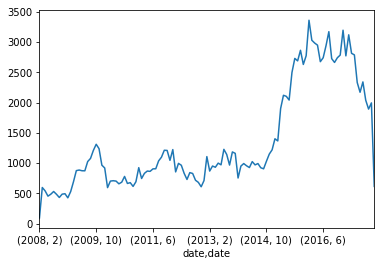

In [229]:
# reviews per month
df_ReviewPerMon = train_data.copy()

df_ReviewPerMon = df_ReviewPerMon.groupby([df_ReviewPerMon.date.dt.year, df_ReviewPerMon.date.dt.month])
df_ReviewPerMon.size().plot()

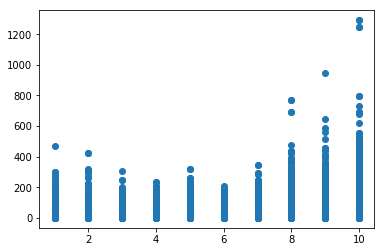

In [138]:
# distribute of rating and usefulCount
df_RatingUseful = train_data[['rating', 'usefulCount']]
df_RatingUseful = df_RatingUseful.set_index('rating')
df_RateUseful.head()

plt.plot(df_RatingUseful, 'o')
plt.show()

<BarContainer object of 882 artists>

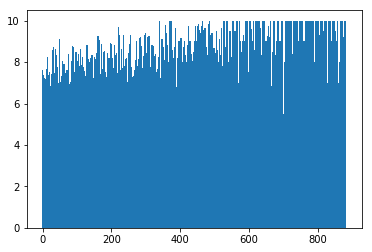

In [170]:
# drug/condition pair average rating
t = []
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
x = [i for i in range(0,len(df_drugPerCond.index))]
for index in df_drugPerCond.index:
    t.append(train_data[train_data.condition == index]['rating'].mean())
plt.bar(x, t, 3.5)


## data preprocess

In [ ]:
# 

In [179]:
# encode drug name
drug_id = pd.factorize(train_data.drugName)
train_data.drugName = drug_id[0]

In [180]:
# encode condition name
condition_id = pd.factorize(train_data.condition)
train_data.condition = condition_id[0]